In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from cornell_visibility_graph import get_cornell_paths

In [3]:
db_paths = get_cornell_paths('/home/nm583/DBoW2/build/db_image_paths.txt')
query_paths = get_cornell_paths('/home/nm583/DBoW2/build/query_image_paths.txt')

In [4]:
rs = {}
with open('/home/nm583/DBoW2/build/dubrovnik_results.log') as f:
    line = ""
    while not line.startswith('Searching'):
        line = next(f)
    while True:
        qn = int(line.split(' ')[3][:-1])
        rfq = []
        for _ in range(100):
            rfq.append(int(next(f).split(' ')[1][:-1]))
        rs[qn] = rfq
        line = next(f)
        if line.startswith('n images::'):
            break
        assert line.startswith('Searching')

In [5]:
results = {}
for qn, rns in rs.items():
    query_path = query_paths[qn]
    result_paths = [db_paths[rn] for rn in rns]
    results[query_path] = result_paths

In [6]:
random_results = {}
for qn, rns in rs.items():
    query_path = query_paths[qn]
    result_paths = np.random.choice(db_paths, size=100)
    random_results[query_path] = result_paths

In [7]:
from evaluation import evaluate_results_dict_dubrovnik

Using TensorFlow backend.


In [8]:
def plot_results(evaluated_results):
    ps = sorted(list(evaluated_results.items()))
    ps = np.array(ps)
    plt.plot(*ps.T)

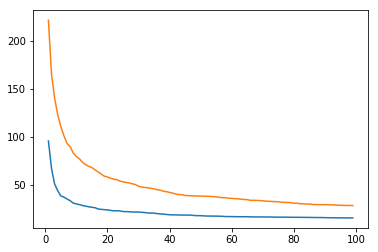

In [9]:
plot_results(evaluate_results_dict_dubrovnik(results))
plot_results(evaluate_results_dict_dubrovnik(random_results))

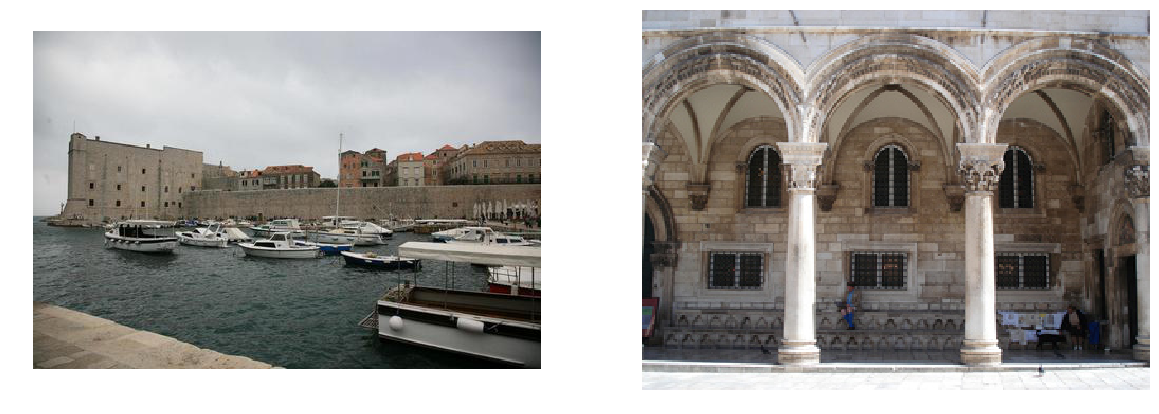

In [19]:
n = np.random.randint(len(results))
path_a = list(results.keys())[n]
path_b = results[path_a][0]

f, [ax0, ax1] = plt.subplots(nrows=1, ncols=2)
f.set_size_inches((20, 20))
ax0.axis('off')
ax1.axis('off')
ax0.imshow(imread(path_a))
ax1.imshow(imread(path_b))